In [0]:
#Using google drive to store training and testing data.
from google.colab import drive
#Retrieving data as objects
import pickle
#Performing fast computations
import numpy as np
#Setting uyp Neural Networks
import tensorflow as tf
#Plotting graphs
import matplotlib.pyplot as plt
#Other utilities
import random

import cv2
#Mounting drive that contains my data.
#If you run this notebook, save the training data in a subdirectory called 'HW4-data'. Look at the next cell to better understand the structure of the directories.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
ls "drive/My Drive/DL Project"

 car.png                  hand/           pose/              sahil-train.mov
 face/                    hand1.jpg       pose1.jpg          sushant-train.mov
 face1.jpg                hand2.jpg       pose2.jpg         'Training Data'/
 face2.jpg                hand3.jpg       pose3.jpg         'Training Data320'/
 flathand.jpg             learnopencv/    PoseTrials.ipynb   wensy-train.mov
 FramesFromVideos.ipynb   mei-train.mov   sahil-train2.mov
 getModels.sh             models/         sahil-train3.mov


In [0]:
BASE_PATH = './drive/My Drive/DL Project/'
SAVED_MODELS = BASE_PATH + 'models/'

## Training Set



In [0]:
######### DONT BOTHER WITH THIS FOR NOW
#training_set_generator = pickle.load(open( "./drive/My Drive/DL Project/stickmap.p", "rb" ))
#training_set_discriminator1 = pickle.load(open("./drive/My Drive/DL Project/train1.p", "rb"))
#training_set_discriminator2 = pickle.load(open("./drive/My Drive/DL Project/train2.p", "rb"))
#training_set_discriminator3 = pickle.load(open("./drive/My Drive/DL Project/train3.p", "rb"))

a = np.stack(pickle.load(open( "./drive/My Drive/DL Project/Training Data/"+str(2)+"_train1.p", "rb" )))/255
#a[1].shape
#b = a[1][...,:3]
#b = b/255
#plt.imshow(b)
print(a.shape)

(4, 640, 640, 6)


## Model

### Generator

In [0]:
def generator(z, layer_output=None):
  with tf.variable_scope("GAN/Generator",reuse=tf.AUTO_REUSE):
    
    #print(z)
    
    #Uncomment all print statements to check output shapes
  
    ######## ENCODING #######
  
    #Convolution 0 and Max Pooling 0
    gen_conv0 = tf.layers.conv2d(z, filters=20, kernel_size=5, strides=2, padding='SAME', activation=tf.nn.relu, kernel_initializer=tf.variance_scaling_initializer())
    #print(gen_conv0)
    gen_pool0 = tf.layers.average_pooling2d(gen_conv0, pool_size=2, strides=2, padding="SAME")
    #print(gen_pool0)
    
    #Convolution 1 and Max Pooling 1
    gen_conv1 = tf.layers.conv2d(gen_pool0, filters=40, kernel_size=5, strides=2, padding='SAME', activation=tf.nn.relu, kernel_initializer=tf.variance_scaling_initializer())
    #print(gen_conv1)
    gen_pool1 = tf.layers.average_pooling2d(gen_conv1, pool_size=2, strides=2, padding="VALID")
    #print(gen_pool1)
    
    
    #Convolution 2 and Max Pooling 2
    gen_conv2 = tf.layers.conv2d(gen_pool1, filters=80, kernel_size=3, strides=1, padding='SAME', activation=tf.nn.relu, kernel_initializer=tf.variance_scaling_initializer())
    #print(gen_conv2)
    gen_pool2 = tf.layers.average_pooling2d(gen_conv2, pool_size=2, strides=2, padding="VALID")
    #print(gen_pool2)
    
    
    #Convolution 3 and Max Pooling 3
    gen_conv3 = tf.layers.conv2d(gen_pool2, filters=100, kernel_size=3, strides=1, padding='SAME', activation=tf.nn.relu, kernel_initializer=tf.variance_scaling_initializer())
    #print(gen_conv3)
    gen_pool3 = tf.layers.average_pooling2d(gen_conv3, pool_size=2, strides=2, padding="VALID")
    #print(gen_pool3)
    
    
  
  
    ######## DECODING #######
  
    #Deconvolution 0
    gen_deconv0 = tf.layers.conv2d_transpose(gen_pool3, filters=80, kernel_size=(3,3), strides=(2,2), padding='SAME', kernel_initializer=tf.variance_scaling_initializer(), activation='relu')
    #print(gen_deconv0)
    if layer_output==0:
      return gen_deconv0
    
    
    #Deconvolution 1
    gen_deconv1 = tf.layers.conv2d_transpose(gen_deconv0, filters=40, kernel_size=(3,3), strides=(2,2), padding='SAME', kernel_initializer=tf.variance_scaling_initializer(), activation='relu')
    #print(gen_deconv1)
    if layer_output==1:
      return gen_deconv1
    
    
    #Deconvolution 2
    gen_deconv2 = tf.layers.conv2d_transpose(gen_deconv1, filters=20, kernel_size=(5,5), strides=(4,4), padding='SAME', kernel_initializer=tf.variance_scaling_initializer(), activation='relu')
    #print(gen_deconv2)
    if layer_output==2:
      return gen_deconv2
    
    #Deconvolution 3
    gen_deconv3 = tf.layers.conv2d_transpose(gen_deconv2, filters=20, kernel_size=(3,3), strides=(2,2), padding='SAME', kernel_initializer=tf.variance_scaling_initializer(), activation='relu')
    #print(gen_deconv3)
  
    
    #Deconvolution 4
    gen_deconv4 = tf.layers.conv2d_transpose(gen_deconv3, filters=3, kernel_size=(3,3), strides=(2,2), padding='SAME', kernel_initializer=tf.variance_scaling_initializer())
    #print(gen_deconv4)
    
    return gen_deconv4

  
  
  
  
  
  

### Discriminator 1

In [0]:
def discriminator_1(z, layer_output = None):
  with tf.variable_scope("GAN/Discriminator1",reuse=tf.AUTO_REUSE):
    
    #print(z)
    
    #Uncomment all print statements to check output shapes
  
    #Convolution 0 and Max Pooling 0
    dis1_conv0 = tf.layers.conv2d(z, filters=20, kernel_size=5, strides=2, padding='SAME', activation=tf.nn.relu, kernel_initializer=tf.variance_scaling_initializer())
    #print(dis1_conv0)
    dis1_pool0 = tf.layers.average_pooling2d(dis1_conv0, pool_size=2, strides=2, padding="SAME")
    #print(dis1_pool0)
    if layer_output==2:
      return dis1_pool0
    
    #Convolution 1 and Max Pooling 1
    dis1_conv1 = tf.layers.conv2d(dis1_pool0, filters=40, kernel_size=5, strides=2, padding='SAME', activation=tf.nn.relu, kernel_initializer=tf.variance_scaling_initializer())
    #print(dis1_conv1)
    dis1_pool1 = tf.layers.average_pooling2d(dis1_conv1, pool_size=2, strides=2, padding="VALID")
    #print(dis1_pool1)
    if layer_output==1:
      return dis1_pool1
    
    
    #Convolution 2 and Max Pooling 2
    dis1_conv2 = tf.layers.conv2d(dis1_pool1, filters=80, kernel_size=3, strides=1, padding='SAME', activation=tf.nn.relu, kernel_initializer=tf.variance_scaling_initializer())
    #print(dis1_conv2)
    dis1_pool2 = tf.layers.average_pooling2d(dis1_conv2, pool_size=2, strides=2, padding="VALID")
    #print(dis1_pool2)
    if layer_output==0:
      return dis1_pool2
    
    
    #Convolution 3 and Max Pooling 3
    dis1_conv3 = tf.layers.conv2d(dis1_pool2, filters=100, kernel_size=3, strides=1, padding='SAME', activation=tf.nn.relu, kernel_initializer=tf.variance_scaling_initializer())
    #print(dis1_conv3)
    dis1_pool3 = tf.layers.average_pooling2d(dis1_conv3, pool_size=2, strides=2, padding="VALID")
    #print(dis1_pool3)
    
    #Flattening
    dis1_flat = tf.layers.flatten(dis1_pool3)
    #print(dis1_flat)
    dis1_logit = tf.layers.dense(dis1_flat, 1, kernel_initializer=tf.variance_scaling_initializer())
    #print(dis1_logit)
    
  
    return dis1_logit

### Discriminator 2

In [0]:
def discriminator_2(z, layer_output = None):
  with tf.variable_scope("GAN/Discriminator2",reuse=tf.AUTO_REUSE):
    
    #print(z)
    
    #Uncomment all print statements to check output shapes
  
    #Convolution 0 and Max Pooling 0
    dis2_conv0 = tf.layers.conv2d(z, filters=20, kernel_size=5, strides=2, padding='SAME', activation=tf.nn.relu, kernel_initializer=tf.variance_scaling_initializer())
    #print(dis2_conv0)
    dis2_pool0 = tf.layers.average_pooling2d(dis2_conv0, pool_size=2, strides=2, padding="SAME")
    #print(dis2_pool0)
    
    #Convolution 1 and Max Pooling 1
    dis2_conv1 = tf.layers.conv2d(dis2_pool0, filters=40, kernel_size=5, strides=2, padding='SAME', activation=tf.nn.relu, kernel_initializer=tf.variance_scaling_initializer())
    #print(dis2_conv1)
    dis2_pool1 = tf.layers.average_pooling2d(dis2_conv1, pool_size=2, strides=2, padding="VALID")
    #print(dis2_pool1)
    
    
    #Convolution 2 and Max Pooling 2
    dis2_conv2 = tf.layers.conv2d(dis2_pool1, filters=80, kernel_size=3, strides=1, padding='SAME', activation=tf.nn.relu, kernel_initializer=tf.variance_scaling_initializer())
    #print(dis2_conv2)
    dis2_pool2 = tf.layers.average_pooling2d(dis2_conv2, pool_size=2, strides=2, padding="VALID")
    #print(dis2_pool2)
    
    
    #Convolution 3 and Max Pooling 3
    dis2_conv3 = tf.layers.conv2d(dis2_pool2, filters=100, kernel_size=3, strides=1, padding='SAME', activation=tf.nn.relu, kernel_initializer=tf.variance_scaling_initializer())
    #print(dis2_conv3)
    dis2_pool3 = tf.layers.average_pooling2d(dis2_conv3, pool_size=2, strides=2, padding="VALID")
    #print(dis2_pool3)
    
    #Flattening
    dis2_flat = tf.layers.flatten(dis2_pool3)
    #print(dis2_flat)
    dis2_logit = tf.layers.dense(dis2_flat, 1, kernel_initializer=tf.variance_scaling_initializer())
    #print(dis2_logit)
    
  
    return dis2_logit
  

### Test Beds /Running

In [0]:
#Graph setup
tf.keras.backend.set_image_data_format('channels_last')
tf.reset_default_graph()

sess = tf.Session()
#sess.run(tf.initialize_all_variables())

In [0]:
#Placeholders
d1_data = tf.placeholder(tf.float32, shape=[None,320,320,6]) #img and map
d2_data = tf.placeholder(tf.float32, shape=[None,320,320,6])
posemap = tf.placeholder(tf.float32, shape=[None,320,320,3])
noise = tf.placeholder(tf.float32, shape=[None,320,320,1])

In [0]:
#generator(d1_data)
#print('=======================')
#discriminator_1(d2_data)


In [0]:
#Pathways
discriminator_1_image_decision = discriminator_1(d1_data)
discriminator_2_image_decision = discriminator_2(d2_data)

generated_image=generator(tf.concat([posemap,noise], 3))

discriminator_1_generated_decision = discriminator_1(tf.concat([posemap,generated_image], 3))
#print(discriminator_1_generated_decision)
discriminator_2_generated_decision = discriminator_2(tf.concat([posemap,generated_image], 3))
#print(discriminator_2_generated_decision)

In [0]:
#Collecting variables
generator_variables = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
discriminator_1_variables = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator1")
discriminator_2_variables = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator2")

In [0]:
#Losses - Normal
discriminator_1_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=discriminator_1_image_decision,labels=tf.ones_like(discriminator_1_image_decision)) + 
                                      tf.nn.sigmoid_cross_entropy_with_logits(logits=discriminator_1_generated_decision, labels=tf.zeros_like(discriminator_1_generated_decision)))
discriminator_2_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=discriminator_2_image_decision,labels=tf.ones_like(discriminator_2_image_decision)) + 
                                      tf.nn.sigmoid_cross_entropy_with_logits(logits=discriminator_2_generated_decision, labels=tf.zeros_like(discriminator_2_generated_decision)))
generator_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=discriminator_1_generated_decision,labels=tf.ones_like(discriminator_1_generated_decision)) + 
                                  tf.nn.sigmoid_cross_entropy_with_logits(logits=discriminator_2_generated_decision,labels=tf.ones_like(discriminator_2_generated_decision)))


#Losses - Wasserstien (add feature matching loss)
#discriminator_1_loss = tf.reduce_mean(discriminator_1_image_decision) - tf.reduce_mean(discriminator_1_generated_decision)
#discriminator_2_loss = tf.reduce_mean(discriminator_2_image_decision) - tf.reduce_mean(discriminator_2_generated_decision)
#generator_loss =  -tf.reduce_mean(discriminator_1_generated_decision) - tf.reduce_mean(discriminator_2_generated_decision)

#FM loss
FM_1 = tf.reduce_mean(tf.square(discriminator_1(tf.concat([posemap,generated_image], 3), layer_output=0) - generator(tf.concat([posemap,noise], 3), layer_output=0)))
FM_2 = tf.reduce_mean(tf.square(discriminator_1(tf.concat([posemap,generated_image], 3), layer_output=1) - generator(tf.concat([posemap,noise], 3), layer_output=1)))
FM_3 = tf.reduce_mean(tf.square(discriminator_1(tf.concat([posemap,generated_image], 3), layer_output=2) - generator(tf.concat([posemap,noise], 3), layer_output=2)))
fm_loss = FM_1 + FM_2 + FM_3


In [0]:
discriminator_1_optimizer = (tf.train.RMSPropOptimizer(learning_rate=1e-4).minimize(discriminator_1_loss, var_list=discriminator_1_variables))
discriminator_2_optimizer = (tf.train.RMSPropOptimizer(learning_rate=1e-4).minimize(discriminator_2_loss, var_list=discriminator_2_variables))
generator_optimizer = (tf.train.RMSPropOptimizer(learning_rate=1e-4).minimize(generator_loss+(0.05*fm_loss), var_list=generator_variables))

#Only when WGAN
#clip_discriminator_1_gradient = [p.assign(tf.clip_by_value(p, -0.01, 0.01)) for p in discriminator_1_variables]
#clip_discriminator_2_gradient = [p.assign(tf.clip_by_value(p, -0.01, 0.01)) for p in discriminator_2_variables]
clip_discriminator_1_gradient = tf.zeros_like(fm_loss)
clip_discriminator_2_gradient = tf.zeros_like(fm_loss)

In [0]:
#CONFIGURATIONS
DISPLAY_STEP = 10
SAVE_STEP = 40
EPOCHS = 10000
MAX_FILE_INDEX = 169

In [0]:
#Storage
gen_losses = []
d1_losses = []
d2_losses = []
gen_images = []
poses_for_gen_images = []

Epoch : 0
.........................................................................................................................................................................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



1.445590313369706
0.9823082680180228
0.9673670992343384


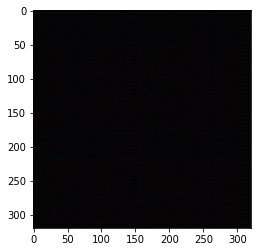

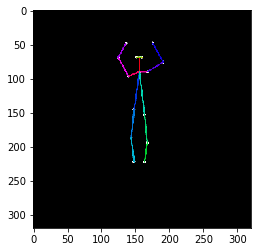

Epoch : 1
.........................................................................................................................................................................
13.978915750627687
0.027267411551822843
0.05944456215003068
Epoch : 2
.........................................................................................................................................................................
23.574405876842476
0.1743443061810839
0.4854140246510877
Epoch : 3
.........................................................................................................................................................................
16.843299630223502
1.310878933095318
1.2086534923033447
Epoch : 4
.........................................................................................................................................................................
14.158856662331953
2.128074051106911
1.3257843507736227
Epoch : 5
.........................................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
3.486158678517539
0.6478397916759965
0.7580008727206281


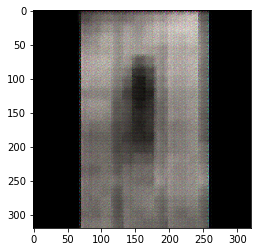

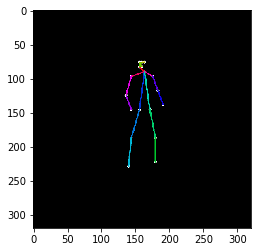

Epoch : 11
.........................................................................................................................................................................
4.671506815408108
0.2967996275460226
0.4576329043983708
Epoch : 12
.........................................................................................................................................................................
6.28608168370625
0.21304785182490152
0.2364335355938539
Epoch : 13
.........................................................................................................................................................................
8.157902415687516
0.13026785401947047
0.09211458105417575
Epoch : 14
.........................................................................................................................................................................
6.468610829855564
0.7707025210687218
0.6284020428639456
Epoch : 15
.......................................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


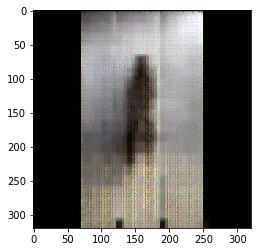

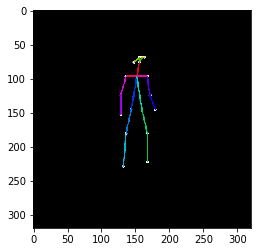

Epoch : 21
.........................................................................................................................................................................
3.00570561335637
0.8552346088477141
0.9972429920935771
Epoch : 22
.........................................................................................................................................................................
3.12759458524941
0.7729758207614605
0.9610831931497924
Epoch : 23
.........................................................................................................................................................................
3.188850840873267
0.7809375439875225
0.9603507028528925
Epoch : 24
.........................................................................................................................................................................
3.2464251126763384
0.7734769057240006
0.9440001254603707
Epoch : 25
..........................................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


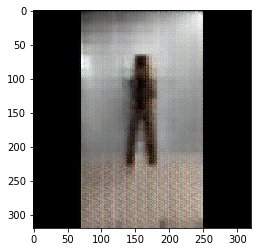

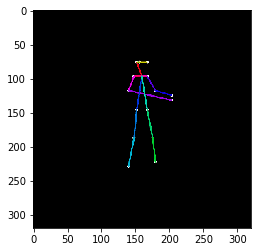

Epoch : 31
.........................................................................................................................................................................
5.777999671958607
0.4660170128976805
0.5517467079606987
Epoch : 32
.........................................................................................................................................................................
5.79502493742655
0.5004759760871089
0.5174896697673572
Epoch : 33
.........................................................................................................................................................................
6.018465162910653
0.4776961447219171
0.4904367250539142
Epoch : 34
.........................................................................................................................................................................
5.774760164805418
0.7022777030894742
0.4942405629219741
Epoch : 35
..........................................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
5.627834040032336
0.6029434476334316
0.5714160132513949


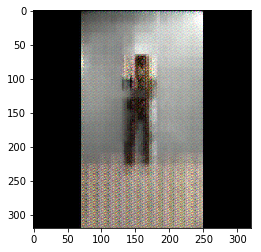

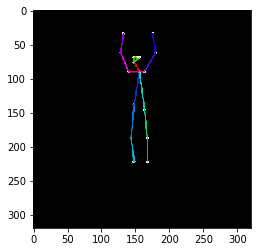

Epoch : 41
.........................................................................................................................................................................
5.923643696942978
0.5671846085398861
0.44158408106387365
Epoch : 42
.........................................................................................................................................................................
6.493554453878008
0.5031407231674392
0.41966802022866245
Epoch : 43
.........................................................................................................................................................................
6.686118404188099
0.4500385206964242
0.4658297646967088
Epoch : 44
.........................................................................................................................................................................
6.9465910746501045
0.4074765280241797
0.4275252055376768
Epoch : 45
......................................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
7.121384975649196
0.3956908471992559
0.4280904524314862


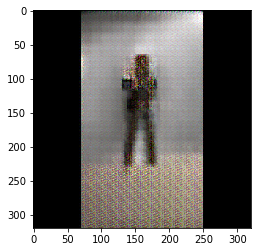

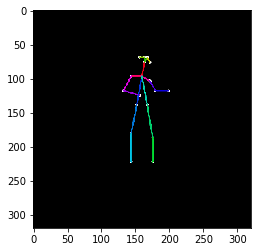

Epoch : 51
.........................................................................................................................................................................
7.628245115985532
0.40860637488978857
0.4518236861586262
Epoch : 52
.........................................................................................................................................................................
8.032879210082736
0.47957554758256354
0.4041520226181942
Epoch : 53
.........................................................................................................................................................................
8.337497790536936
0.4117215127248824
0.3766204504321671
Epoch : 54
.........................................................................................................................................................................
8.23721244172937
0.2379943518238087
0.5387958948109188
Epoch : 55
........................................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


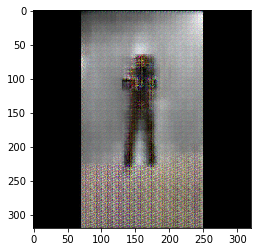

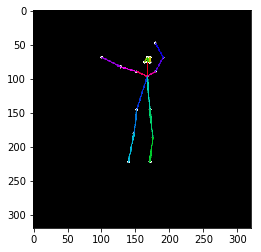

Epoch : 61
.........................................................................................................................................................................
11.623201844254895
0.4010347681968699
0.23081850363521977
Epoch : 62
.........................................................................................................................................................................
10.259077190647464
0.5740448068000773
0.22274585544125153
Epoch : 63
.........................................................................................................................................................................
10.539709195582825
0.13590005333359717
0.8107182887200605
Epoch : 64
.........................................................................................................................................................................
10.725628693428265
0.8294441678654954
0.16354802634036006
Epoch : 65
.................................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


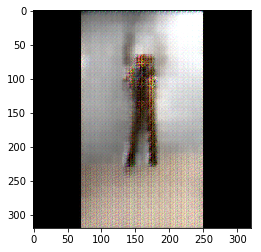

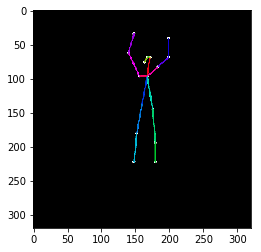

Epoch : 71
.........................................................................................................................................................................
12.57471407588417
0.22552846666588552
0.7152823448269325
Epoch : 72
.........................................................................................................................................................................
11.348154989219982
0.1817723448837235
0.5398428824636534
Epoch : 73
.........................................................................................................................................................................
11.533163778880644
0.4584550520182331
0.12062421640144512
Epoch : 74
.........................................................................................................................................................................
10.536229692796278
0.10135338206773076
0.9485939917920609
Epoch : 75
...................................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
12.317566685422637
0.7106350514798055
0.05849905398109195


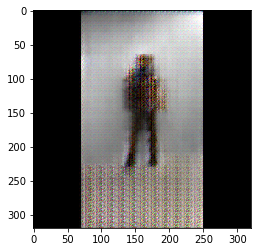

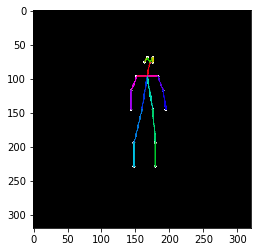

Epoch : 81
.........................................................................................................................................................................
10.695969226709485
0.19316000425767915
0.706878277787697
Epoch : 82
.........................................................................................................................................................................
10.884468279470353
0.12174886564486323
0.7578028483459582
Epoch : 83
.........................................................................................................................................................................
11.90465801284158
0.5699995116563664
0.22028262269309137
Epoch : 84
.........................................................................................................................................................................
10.918052928334863
0.23278240096247646
0.7126034760874208
Epoch : 85
...................................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


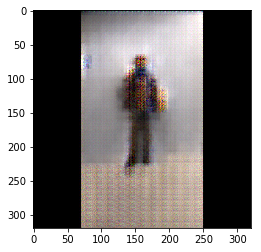

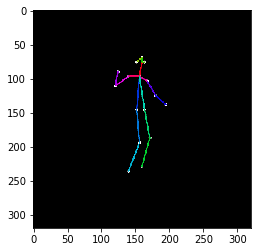

Epoch : 91
.........................................................................................................................................................................
11.602173307238246
0.13163212822019515
0.6290551642143338
Epoch : 92
.........................................................................................................................................................................
10.581835175407003
0.14250393887834015
0.6027689464831141
Epoch : 93
.........................................................................................................................................................................
10.292980685036563
0.08108955182294574
0.7965947222956539
Epoch : 94
.........................................................................................................................................................................
10.668502206633077
0.11890888548110072
0.6685963605899783
Epoch : 95
.................................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
9.506749306910137
0.13256905775094616
0.6338063032426954


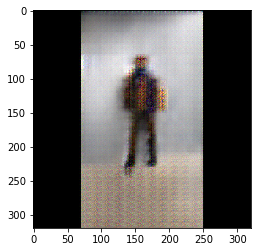

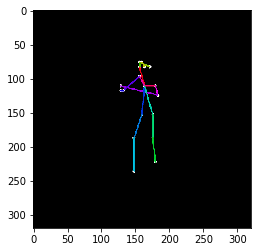

Epoch : 101
.........................................................................................................................................................................
10.743312256576042
0.060108478492703295
0.6889130818332441
Epoch : 102
.........................................................................................................................................................................
10.368254928193855
0.08671049491528005
0.5780092274119868
Epoch : 103
.........................................................................................................................................................................
10.870817963188216
0.1272687652007437
0.5636175236053015
Epoch : 104
.........................................................................................................................................................................
10.391149536392392
0.09817897306446968
0.6171006991158752
Epoch : 105
............................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



11.055723819506944
0.12817711003628693
0.6696872824262938


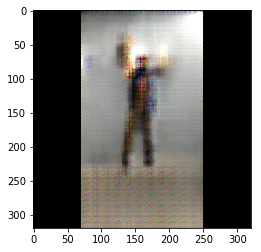

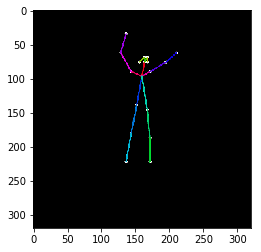

Epoch : 111
.........................................................................................................................................................................
12.734248389859172
0.12926644238342094
0.5165036981815153
Epoch : 112
.........................................................................................................................................................................
10.428005001954073
0.09024756917298238
0.804509889444656
Epoch : 113
.........................................................................................................................................................................
11.143002780936879
0.11062293472343687
0.5382080892343405
Epoch : 114
.........................................................................................................................................................................
11.265030151288185
0.07811485175955853
0.7725658269499885
Epoch : 115
.............................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
11.728505365947294
0.05017719984555875
0.7459025513270551


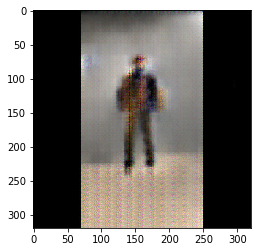

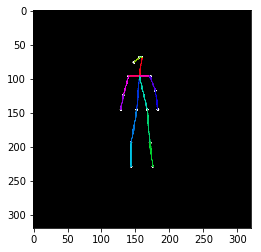

Epoch : 121
.........................................................................................................................................................................
11.108386326118334
0.07887747198410633
0.8181569529972839
Epoch : 122
.........................................................................................................................................................................
11.766835655686418
0.10487141530255772
0.6358355004119979
Epoch : 123
.........................................................................................................................................................................
11.314034730019655
0.0836077686741883
0.6077990363401597
Epoch : 124
.........................................................................................................................................................................
12.173664013662282
0.1495226195050064
0.41856746603776124
Epoch : 125
.............................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


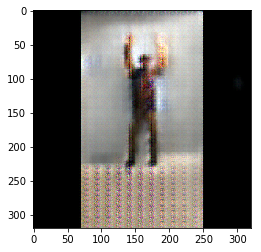

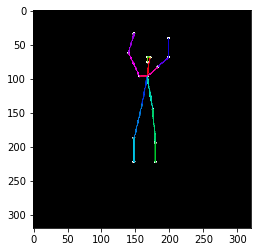

Epoch : 131
.........................................................................................................................................................................
12.390066606758614
0.6322074972904913
0.18335313226529273
Epoch : 132
.........................................................................................................................................................................
10.23785323363084
0.06492992956957645
1.0111709756435021
Epoch : 133
.........................................................................................................................................................................
9.943994187744412
0.06526618525051765
0.6981752433940857
Epoch : 134
.........................................................................................................................................................................
10.281395138368099
0.09018278734194243
0.5956831987087543
Epoch : 135
..............................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
11.649148293500822
0.06997439729450798
0.609718237105294


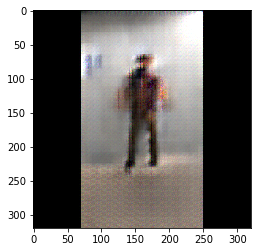

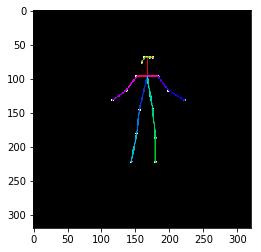

Epoch : 141
.........................................................................................................................................................................
13.332123670352281
0.4621385117018114
0.16978153035748328
Epoch : 142
.........................................................................................................................................................................
12.640241329486553
0.2629626184964134
0.7394141804144492
Epoch : 143
.........................................................................................................................................................................
12.523591338177404
0.1929965607200474
0.5294595694954
Epoch : 144
.........................................................................................................................................................................
11.39621964855307
0.07883084481550778
0.7400753265522289
Epoch : 145
..................................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
11.8158145120158
0.06458109177796448
0.5663265270902913


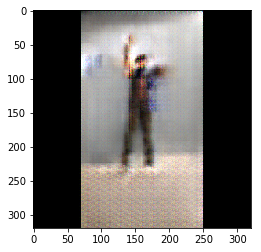

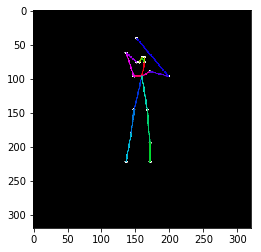

Epoch : 151
.........................................................................................................................................................................
13.452326994675856
0.14128938569455488
0.5481782615399704
Epoch : 152
.........................................................................................................................................................................
12.841054145401046
0.07260382149509553
0.665420746805488
Epoch : 153
.........................................................................................................................................................................
11.346632539873292
0.06269439520193755
0.695351379477149
Epoch : 154
.........................................................................................................................................................................
11.342401654057248
0.059895268259698944
0.6828754443300546
Epoch : 155
.............................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
12.54539260567998
0.054615037889442046
0.7014365721956866


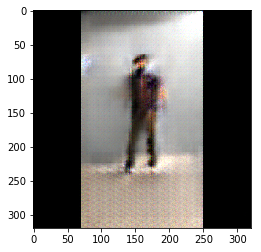

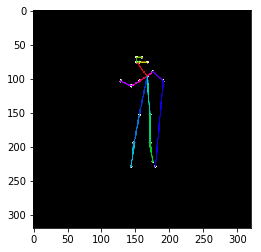

Epoch : 161
.........................................................................................................................................................................
13.454618473730143
0.14426890300920253
0.6353499894443702
Epoch : 162
.........................................................................................................................................................................
11.941238445643137
0.04890060443059565
0.5740844312856889
Epoch : 163
.........................................................................................................................................................................
12.303563309139049
0.0712920262667709
0.7206879028466326
Epoch : 164
.........................................................................................................................................................................
11.970051609552824
0.07281407355953928
0.6625847364693175
Epoch : 165
.............................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
13.597286326998084
0.08570576030332949
0.48795073053981425


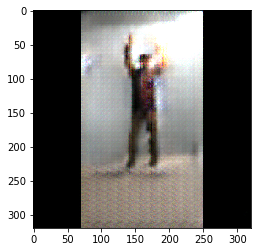

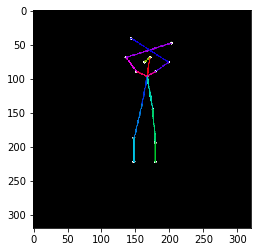

Epoch : 171
.........................................................................................................................................................................
14.394546788119705
0.6637685256530766
0.18138002013130014
Epoch : 172
.........................................................................................................................................................................
16.406792553218864
0.7845838956656099
0.011368253129653325
Epoch : 173
.........................................................................................................................................................................
15.100635122265336
0.33025558726633375
0.17720143981504535
Epoch : 174
.........................................................................................................................................................................
12.952060411667683
0.08091641803894055
0.6003524772392327
Epoch : 175
..........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
13.38169835446149
0.13213562395255055
0.5027238456280929


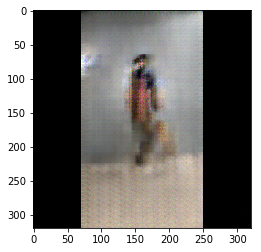

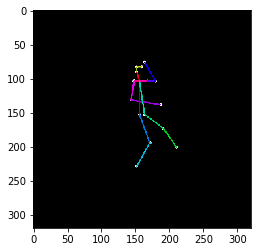

Epoch : 181
.........................................................................................................................................................................
12.43543378488552
0.0419093275177147
0.635547286202613
Epoch : 182
.........................................................................................................................................................................
12.507245548378082
0.093804041706429
0.41081596573969054
Epoch : 183
.........................................................................................................................................................................
12.006678722313875
0.05461090372551881
0.756865152262548
Epoch : 184
.........................................................................................................................................................................
13.411531112603182
0.11842117615318334
0.36330001722069283
Epoch : 185
................................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
13.715778772647564
0.05342408668140502
0.5427602470615471


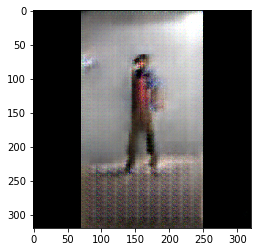

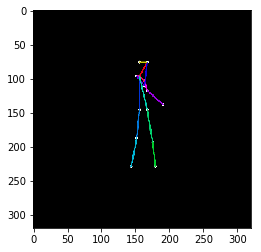

Epoch : 191
.........................................................................................................................................................................
15.891060853145532
0.5801769767900548
0.009950090131351532
Epoch : 192
.........................................................................................................................................................................
13.263253773457905
0.28995942752052967
0.48254477093122977
Epoch : 193
.........................................................................................................................................................................
13.157746131603535
0.16982657277724592
0.4447107047634578
Epoch : 194
.........................................................................................................................................................................
14.060340965993305
0.4400739763744903
0.11165731829119041
Epoch : 195
..........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


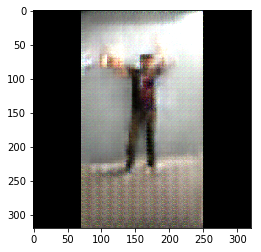

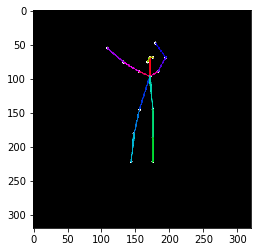

Instructions for updating:
Use standard file APIs to delete files with this prefix.
Epoch : 201
.........................................................................................................................................................................
14.415062342875103
0.24453253851965276
0.3109361909934312
Epoch : 202
.........................................................................................................................................................................
13.666674303585255
0.0489161087152281
0.6063332163712242
Epoch : 203
.........................................................................................................................................................................
13.318742354240642
0.07640496214130656
0.5181470898947177
Epoch : 204
.........................................................................................................................................................................
14.084600863372

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
13.910758897397645
0.07045403374659645
0.5992503106847582


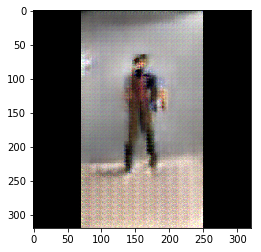

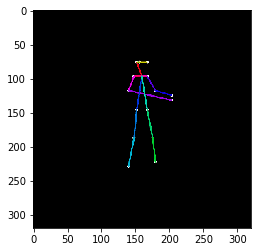

Epoch : 211
.........................................................................................................................................................................
13.57536350904837
0.05891403985345697
0.4876682792387947
Epoch : 212
.........................................................................................................................................................................
13.714544073364438
0.3403020348333947
0.35245671203387857
Epoch : 213
.........................................................................................................................................................................
12.555500082715728
0.048603624762806934
0.590194210578197
Epoch : 214
.........................................................................................................................................................................
13.027055528742322
0.12138710780812843
0.4048740354107594
Epoch : 215
.............................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


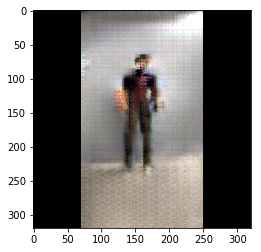

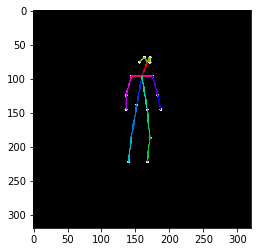

Epoch : 221
.........................................................................................................................................................................
13.122303788125867
0.02988499085993616
0.6318768225885796
Epoch : 222
.........................................................................................................................................................................
13.251427829618285
0.24613078087112675
0.23197975720889583
Epoch : 223
.........................................................................................................................................................................
12.670971660219001
0.05713893014930385
0.8481103826407894
Epoch : 224
.........................................................................................................................................................................
14.534238964848264
0.12217592914206471
0.44255158245582793
Epoch : 225
..........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
15.09276814150387
0.399483412941783
0.2794926048241776


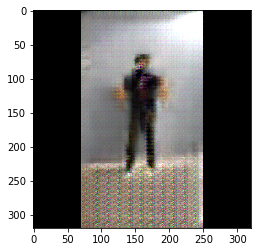

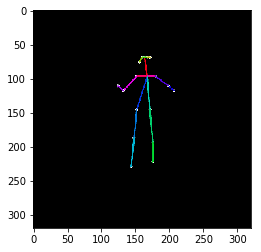

Epoch : 231
.........................................................................................................................................................................
14.607669638458793
0.6734131543122827
0.009980981554448343
Epoch : 232
.........................................................................................................................................................................
12.418107763549985
0.12411849651011539
0.5106914236162514
Epoch : 233
.........................................................................................................................................................................
12.994042883257894
0.06607384035715531
0.4943287031140906
Epoch : 234
.........................................................................................................................................................................
13.755477387524216
0.04662834634334612
0.39078176865828107
Epoch : 235
..........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



15.050366061679005
0.09820384405536475
0.4730624463243862


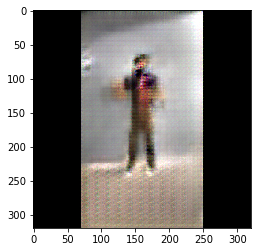

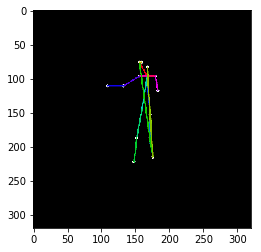

Epoch : 241
.........................................................................................................................................................................
14.115395915578809
0.0698516534839993
0.6038025145766122
Epoch : 242
.........................................................................................................................................................................
14.80231448179166
0.057169760636479904
0.38697136212388306
Epoch : 243
.........................................................................................................................................................................
14.95082132915068
0.05926897800311674
0.46478980050295504
Epoch : 244
.........................................................................................................................................................................
15.137091257163053
0.05027248809811851
0.5441551793631189
Epoch : 245
............................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
16.271565125538753
0.0864465626630255
0.3213931088578287


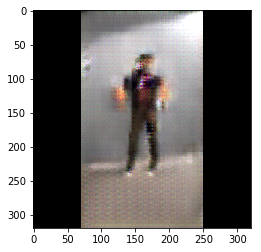

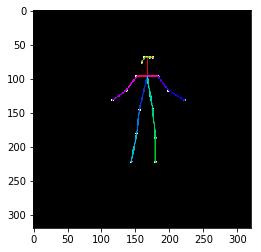

Epoch : 251
.........................................................................................................................................................................
13.93574055553188
0.028180047394397313
0.6700503417847337
Epoch : 252
.........................................................................................................................................................................
14.590087614115879
0.0755701492299993
0.5074473335614329
Epoch : 253
.........................................................................................................................................................................
15.468237639884272
0.0386502150907843
0.4903206411699527
Epoch : 254
.........................................................................................................................................................................
16.651392610820793
0.03640575286177421
0.5167407537231872
Epoch : 255
..............................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


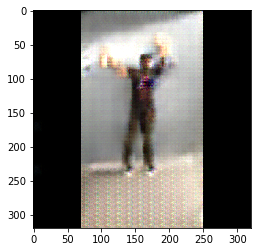

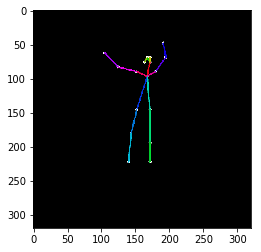

Epoch : 261
.........................................................................................................................................................................
15.497294132526104
0.06116009236642229
0.4119543133402717
Epoch : 262
.........................................................................................................................................................................
15.438894209777109
0.04632457011447316
0.5367060708289845
Epoch : 263
.........................................................................................................................................................................
15.522024989833493
0.046753419131071054
0.5546648541176774
Epoch : 264
.........................................................................................................................................................................
15.446552265325241
0.20705095315162594
0.3687823524654873
Epoch : 265
...........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


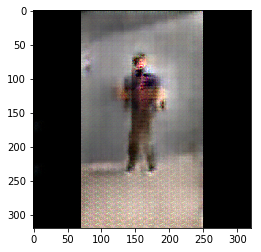

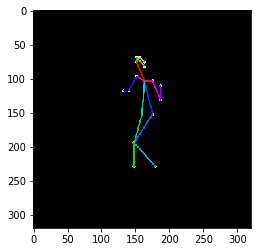

Epoch : 271
.........................................................................................................................................................................
16.193674553075486
0.03803964223541197
0.41064588383209377
Epoch : 272
.........................................................................................................................................................................
15.923503091349405
0.07217159266756336
0.4056221069464978
Epoch : 273
.........................................................................................................................................................................
14.497785068827973
0.13001419027953223
0.6479006272426547
Epoch : 274
.........................................................................................................................................................................
14.554073129179915
0.03411541913235114
0.33691127148605665
Epoch : 275
..........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
15.259568087448029
0.03484015214466159
0.5248145541705235


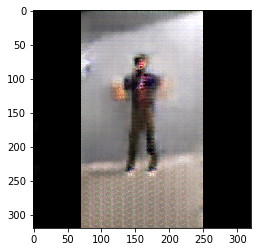

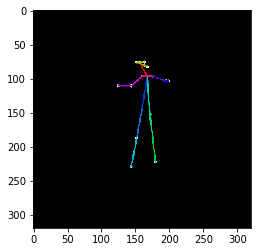

Epoch : 281
.........................................................................................................................................................................
14.474657304188204
0.059954169720957746
0.3825426946477496
Epoch : 282
.........................................................................................................................................................................
16.64960551967282
0.045115752287839206
0.37680268479192897
Epoch : 283
.........................................................................................................................................................................
15.513978382539467
0.05752134058495747
0.48215593698540615
Epoch : 284
.........................................................................................................................................................................
15.023772528185647
0.028165356616122378
0.6259462761984774
Epoch : 285
........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



16.09051558251917
0.08745348891754424
0.3291790136749189


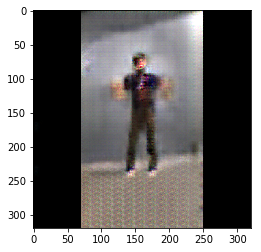

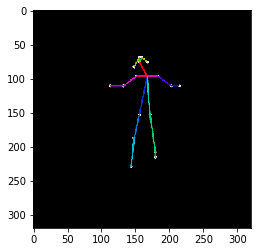

Epoch : 291
.........................................................................................................................................................................
16.858902719599257
0.017878494733341993
0.4387761148287964
Epoch : 292
.........................................................................................................................................................................
16.862375676984616
0.06921691322820131
0.4881361266639436
Epoch : 293
.........................................................................................................................................................................
15.987564769722301
0.04194050289275338
0.19323590215169495
Epoch : 294
.........................................................................................................................................................................
16.7667144431165
0.05694539318054016
0.5277868291199863
Epoch : 295
............................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


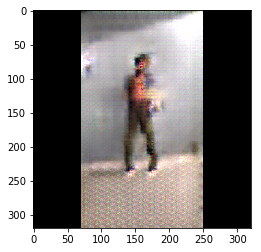

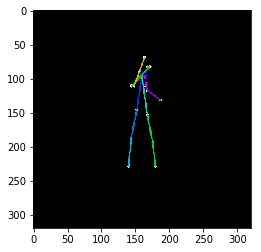

Epoch : 301
.........................................................................................................................................................................
16.419526932507576
0.07191617941933762
0.48840516202390116
Epoch : 302
.........................................................................................................................................................................
17.67985588135804
0.028379204969789792
0.5289416708873266
Epoch : 303
.........................................................................................................................................................................
15.941515854829866
0.04924397247326897
0.34055581618549535
Epoch : 304
.........................................................................................................................................................................
16.66548182414128
0.05129938301344059
0.3713290026761349
Epoch : 305
...........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


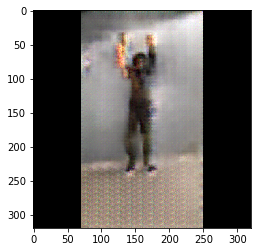

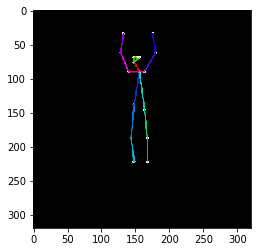

Epoch : 311
.........................................................................................................................................................................
17.362291341702612
0.04655352102993139
0.38378647147518025
Epoch : 312
.........................................................................................................................................................................
15.857333926759528
0.02169839406777679
0.5560113016747423
Epoch : 313
.........................................................................................................................................................................
15.141620579555894
0.02474283659687159
0.33716706123227835
Epoch : 314
.........................................................................................................................................................................
17.811859802381527
0.09069142752716475
0.3946541403661366
Epoch : 315
..........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
16.356100753214232
0.028766210259380462
0.7496313745391516


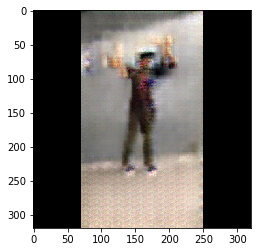

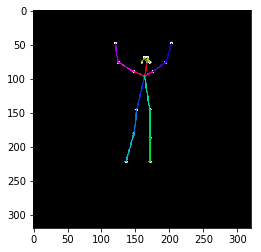

Epoch : 321
.........................................................................................................................................................................
18.057452740753895
0.07926109385857157
0.38560334769264965
Epoch : 322
.........................................................................................................................................................................
16.798510793838982
0.03697480477044517
0.43629282180319084
Epoch : 323
.........................................................................................................................................................................
16.773293771687342
0.04587345725905404
0.47850369454840935
Epoch : 324
.........................................................................................................................................................................
18.05114483974389
0.07479215007518769
0.471598878311346
Epoch : 325
...........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


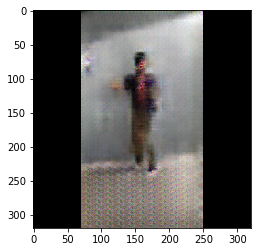

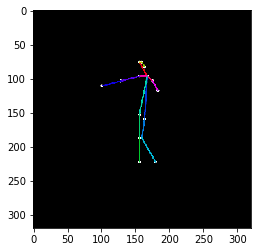

Epoch : 331
.........................................................................................................................................................................
16.471591318500113
0.025850362860069715
0.4500590222033523
Epoch : 332
.........................................................................................................................................................................
17.732347426329845
0.02718594157774554
0.5253367306121773
Epoch : 333
.........................................................................................................................................................................
16.98850733994027
0.03382646089475556
0.49803538893393556
Epoch : 334
.........................................................................................................................................................................
18.60487413406372
0.02065431738913584
0.53075843814591
Epoch : 335
..............................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


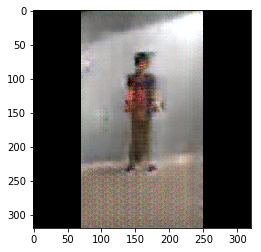

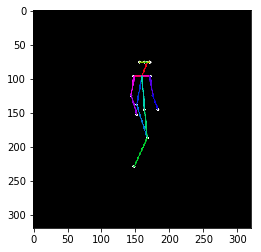

Epoch : 341
.........................................................................................................................................................................
18.868664329573953
0.14862042626630587
0.13821373163698045
Epoch : 342
.........................................................................................................................................................................
17.07699930315187
0.0897619092947838
0.49551810197766905
Epoch : 343
.........................................................................................................................................................................
18.011056124105963
0.01716553151576657
0.8781925871053479
Epoch : 344
.........................................................................................................................................................................
18.664367252553003
0.25535094322307067
0.3092476632540337
Epoch : 345
............................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
18.78039619696916
0.03941583280544367
0.4674346521111018


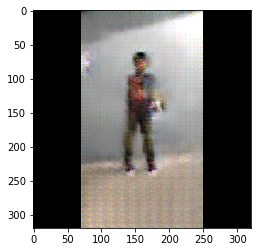

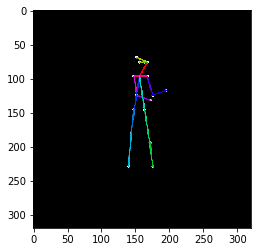

Epoch : 351
.........................................................................................................................................................................
19.761893698449672
0.02854219730667333
0.4159563503899066
Epoch : 352
.........................................................................................................................................................................
17.32599785200943
0.051035742670039935
0.3489155727014987
Epoch : 353
.........................................................................................................................................................................
17.36531709213934
0.052366489245109775
0.5908033607221765
Epoch : 354
.........................................................................................................................................................................
17.228076869919455
0.06350583096481865
0.3156304589116921
Epoch : 355
............................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


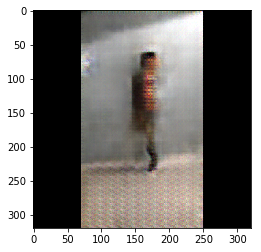

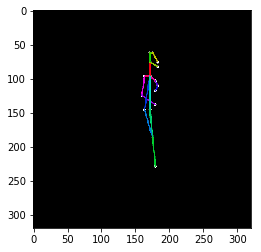

Epoch : 361
.........................................................................................................................................................................
20.17764639149051
0.13756252199484295
0.19218245336105072
Epoch : 362
.........................................................................................................................................................................
18.13060431367547
0.04319916355167127
0.42605425933094904
Epoch : 363
.........................................................................................................................................................................
18.71176975859693
0.017364080602056315
0.5058050240326629
Epoch : 364
.........................................................................................................................................................................
19.820161043539557
0.06428329942490106
0.3074698094426676
Epoch : 365
............................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
19.884938271088007
0.02148145450820204
0.3257573983745171


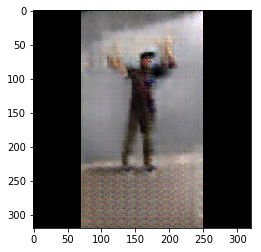

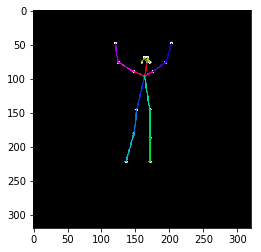

Epoch : 371
.........................................................................................................................................................................
21.08968885974771
0.08280654040864428
0.3696979510216607
Epoch : 372
.........................................................................................................................................................................
19.65523310666959
0.15572512617898304
0.15725784377586421
Epoch : 373
.........................................................................................................................................................................
17.923692367485994
0.064225441677659
0.2632390432877858
Epoch : 374
.........................................................................................................................................................................
19.258132206617727
0.011084037611833488
0.6920232485191753
Epoch : 375
..............................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
18.698057878762484
0.013415969439341178
0.43829251694446153


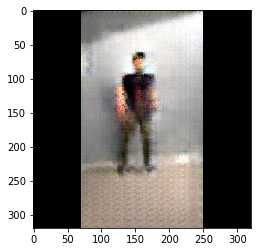

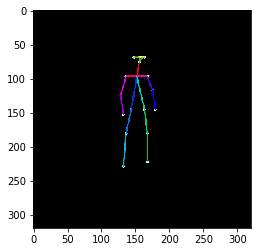

Epoch : 381
.........................................................................................................................................................................
18.729901167062614
0.04498925558007414
0.3325491565707265
Epoch : 382
.........................................................................................................................................................................
18.38220912747129
0.040133998959599015
0.16592492749735427
Epoch : 383
.........................................................................................................................................................................
18.741233309345134
0.045176892361003265
0.21300811134638267
Epoch : 384
.........................................................................................................................................................................
20.38821336926793
0.05177088573594885
0.3207793857588497
Epoch : 385
..........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
18.863708905214388
0.02932533801435375
0.5469159842799445


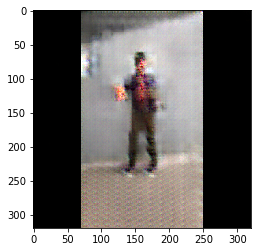

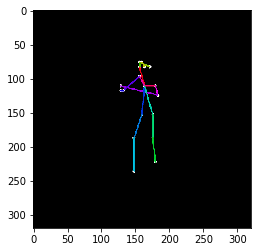

Epoch : 391
.........................................................................................................................................................................
18.964663464642136
0.03217990062009753
0.5160539672109326
Epoch : 392
.........................................................................................................................................................................
20.30474068568303
0.028781894168101136
0.42444770983089664
Epoch : 393
.........................................................................................................................................................................
19.47560259999608
0.03166404852239467
0.46583673407009546
Epoch : 394
.........................................................................................................................................................................
17.455017284528743
0.047950919328660316
0.4184318239505805
Epoch : 395
..........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



17.564053986904888
0.018897702877365134
0.4704093459481098


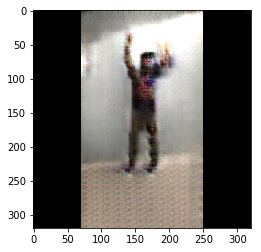

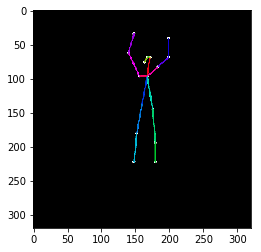

Epoch : 401
.........................................................................................................................................................................
18.928893248710406
0.020581165548459537
0.4037599503200435
Epoch : 402
.........................................................................................................................................................................
18.411765021685312
0.008454884822678786
0.4664691471945585
Epoch : 403
.........................................................................................................................................................................
20.556898133994558
0.028177785733788596
0.2228040616790049
Epoch : 404
.........................................................................................................................................................................
20.89897651785224
0.04184258511231254
0.16203347491187398
Epoch : 405
.........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



19.2424327748767
0.03812484729014535
0.34542314045629935


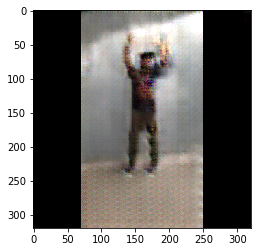

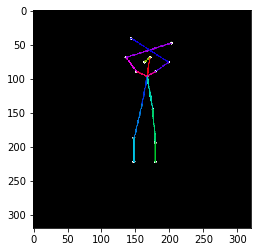

Epoch : 411
.........................................................................................................................................................................
17.691884534598806
0.019722799738280762
0.47385490687630144
Epoch : 412
.........................................................................................................................................................................
17.94723734206702
0.03090161830001851
0.4821659120195132
Epoch : 413
.........................................................................................................................................................................
20.42790610127195
0.018432601584810436
0.4939769185258395
Epoch : 414
.........................................................................................................................................................................
21.380445536777113
0.0813023129541553
0.17569241298512825
Epoch : 415
...........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



0.009531596040385908
0.5642470090878031


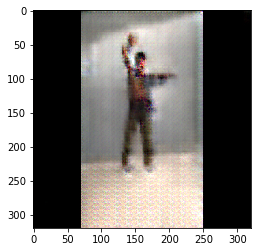

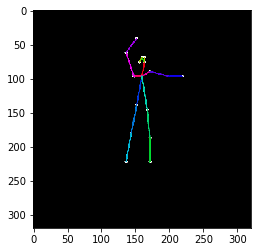

Epoch : 421
.........................................................................................................................................................................
23.057119073247062
0.04140244054561372
0.4221350647908286
Epoch : 422
.........................................................................................................................................................................
20.89950562652046
0.06477765442832777
0.24140817044439214
Epoch : 423
.........................................................................................................................................................................
18.831596196755854
0.05569018313354353
0.16951976433914182
Epoch : 424
.........................................................................................................................................................................
21.988539949676696
0.0692615811754467
0.18285442903627683
Epoch : 425
...........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


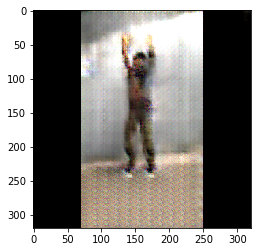

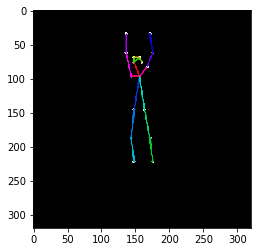

Epoch : 431
.........................................................................................................................................................................
21.11641465982742
0.07818549282655511
0.2794879648346827
Epoch : 432
.........................................................................................................................................................................
18.933598287006806
0.05376628589231648
0.08855038381546919
Epoch : 433
.........................................................................................................................................................................
21.073729241388083
0.02210969013715542
0.675706622175791
Epoch : 434
.........................................................................................................................................................................
19.335922517720057
0.013341246156676862
0.41852804103032026
Epoch : 435
...........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
19.885316797967494
0.07332534167203454
0.46977459033488345


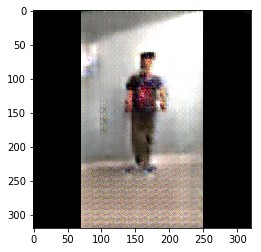

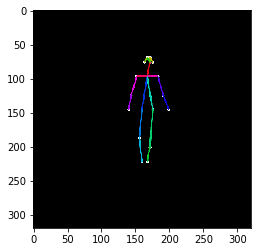

Epoch : 441
.........................................................................................................................................................................
21.25679939315164
0.12965964016690262
0.005016492149364377
Epoch : 442
.........................................................................................................................................................................
21.99638850872333
0.039061334211605306
0.7392749736289008
Epoch : 443
.........................................................................................................................................................................
18.98858730045296
0.01937577542041573
0.44894176124686036
Epoch : 444
.........................................................................................................................................................................
20.43503502840121
0.061335963992016386
0.1468993484113364
Epoch : 445
...........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


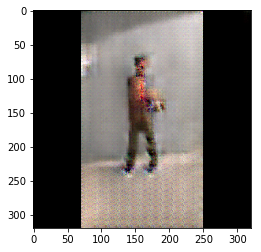

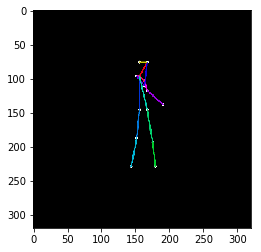

Epoch : 451
.........................................................................................................................................................................
20.95618594468698
0.1380267502682619
0.058148080872348074
Epoch : 452
.........................................................................................................................................................................
22.420278786202154
0.11304133480632177
0.14447016460920398
Epoch : 453
.........................................................................................................................................................................
18.751049273112823
0.03978443698517328
0.6440804042794777
Epoch : 454
.........................................................................................................................................................................
21.195366692966257
0.06959942824410328
0.6530228468986261
Epoch : 455
...........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
19.93198610903949
0.014669454847486359
0.381897099730247


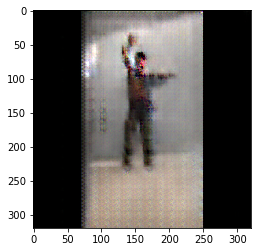

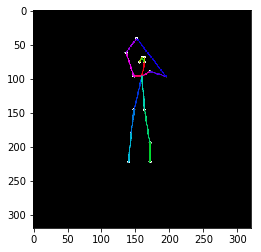

Epoch : 461
.........................................................................................................................................................................
22.966832072071774
0.026425549083022935
0.37028535884557384
Epoch : 462
.........................................................................................................................................................................
22.748629970663398
0.6589211450641875
0.015323536231485996
Epoch : 463
.........................................................................................................................................................................
21.006884157304935
0.0308528859788404
0.09267071595201026
Epoch : 464
.........................................................................................................................................................................
21.914829965173844
0.09080763841086359
0.04947720182263017
Epoch : 465
........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



20.138727097821658
0.016795184783185927
0.5459256742537757


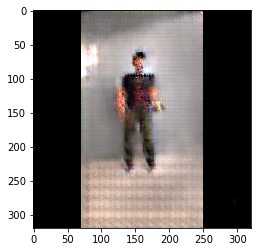

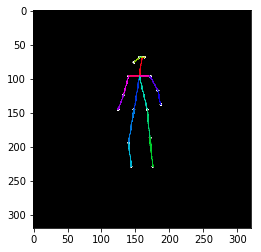

Epoch : 471
.........................................................................................................................................................................
22.620735377249634
0.03925974876806193
0.3277364753646681
Epoch : 472
.........................................................................................................................................................................
25.00484879059199
1.4752584395278971
0.052339410083645274
Epoch : 473
.........................................................................................................................................................................
19.901943697731877
0.1682500223344475
0.14556158808643388
Epoch : 474
.........................................................................................................................................................................
19.47387399052727
0.06079306510309344
0.25635144281422656
Epoch : 475
............................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


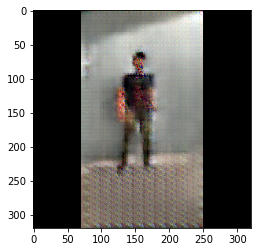

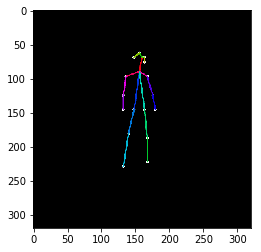

Epoch : 481
.........................................................................................................................................................................
21.54674089307616
0.06610447647939102
0.34328042957866317
Epoch : 482
.........................................................................................................................................................................
20.851734065445218
0.09845673425436291
0.06057543583026055
Epoch : 483
.........................................................................................................................................................................
21.837127550113834
0.04907926657432155
0.2834303569269699
Epoch : 484
.........................................................................................................................................................................
19.974362994086814
0.009712321189812554
0.4097905420572855
Epoch : 485
..........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
20.432788543799926
0.11176612118086933
0.1286613981665491


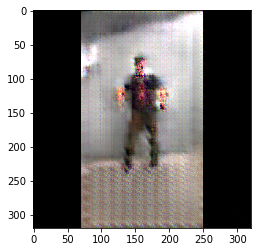

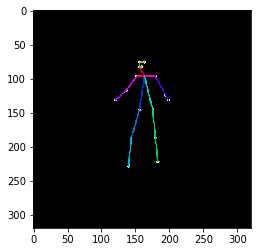

Epoch : 491
.........................................................................................................................................................................
19.484039134527805
0.015773510895843588
0.42845582575052055
Epoch : 492
.........................................................................................................................................................................
19.752286005302295
0.010521168831830126
0.6598532506445225
Epoch : 493
.........................................................................................................................................................................
22.77786524902434
0.04352898327623506
0.09707062341084775
Epoch : 494
.........................................................................................................................................................................
25.959245506828353
0.18426682532636848
0.012027402928665127
Epoch : 495
.......................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


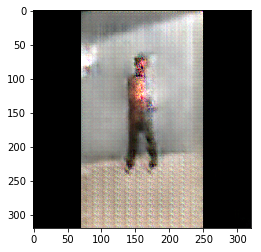

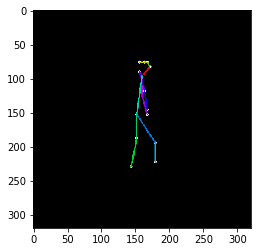

Epoch : 501
.........................................................................................................................................................................
21.979166155030743
0.0033307826927059347
0.385154940720755
Epoch : 502
.........................................................................................................................................................................
22.434283795441395
0.03135529834799272
0.33817605873223355
Epoch : 503
.........................................................................................................................................................................
23.398381616942277
0.0962312834712148
0.05542737783367051
Epoch : 504
.........................................................................................................................................................................
21.142003084780903
0.010430436129207897
0.7437033028245047
Epoch : 505
.........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


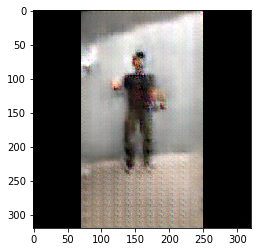

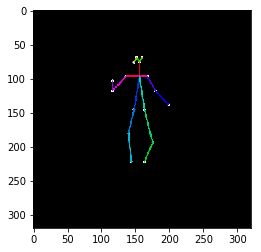

Epoch : 511
.........................................................................................................................................................................
22.17473725736494
0.02979428154485185
0.4594355250234142
Epoch : 512
.........................................................................................................................................................................
25.739497201682546
0.08314696323575754
0.09170338899092008
Epoch : 513
.........................................................................................................................................................................
23.160812908375757
0.019244956121145736
0.28393588235295936
Epoch : 514
.........................................................................................................................................................................
22.87901995591158
0.006739515953146161
0.4426163655490313
Epoch : 515
..........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
24.065044752944857
0.0673783906652714
0.31796782849136107


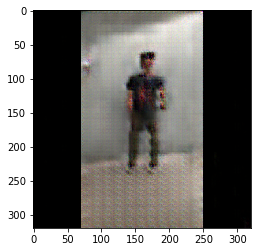

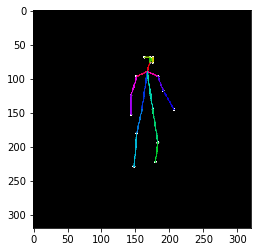

Epoch : 521
.........................................................................................................................................................................
21.784791641686795
0.02310273987976931
0.449978255262783
Epoch : 522
.........................................................................................................................................................................
22.857702791338138
0.04332075574518468
0.3021377342017423
Epoch : 523
.........................................................................................................................................................................
26.321303813415167
0.01998502562492612
0.3651519283366778
Epoch : 524
.........................................................................................................................................................................
24.052884790318956
0.06911934933389971
0.21928793820212408
Epoch : 525
............................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



24.10311707378139
0.08385007695700383
0.18168925332093538


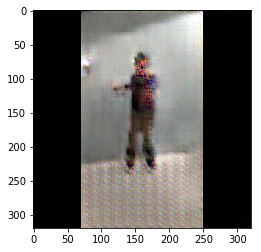

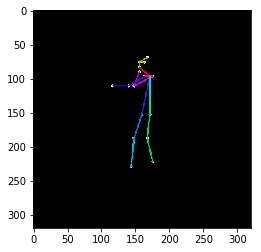

Epoch : 531
.........................................................................................................................................................................
22.70785645479281
0.016404659847836324
0.16278074262569006
Epoch : 532
.........................................................................................................................................................................
23.649908472095017
0.017495112473321656
0.07314176551337163
Epoch : 533
.........................................................................................................................................................................
23.920254391326
0.020419438203336245
0.3098089239091134
Epoch : 534
.........................................................................................................................................................................
23.029203290770038
0.06328116138585424
0.16708490647683713
Epoch : 535
..........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
23.341366181006798
0.00886161361808286
0.39740047973085374


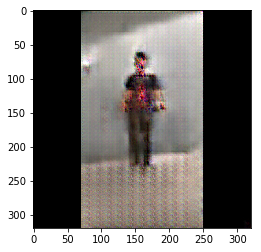

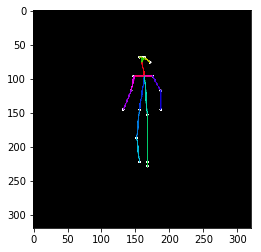

Epoch : 541
.........................................................................................................................................................................
21.967816998972694
0.04054327205533728
0.20753583039758802
Epoch : 542
.........................................................................................................................................................................
21.773704717850546
0.023213029577273794
0.2869031885251356
Epoch : 543
.........................................................................................................................................................................
23.325466099575426
0.06541827504804251
0.1745114395598648
Epoch : 544
.........................................................................................................................................................................
23.147114962515747
0.11768666472708898
0.011586889069513266
Epoch : 545
........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



25.953569220367974
0.11046009147063579
0.07890093465713355


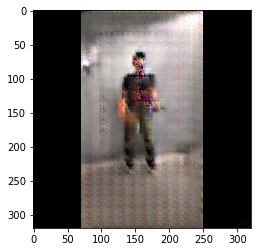

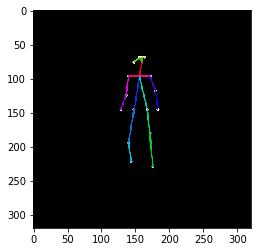

Epoch : 551
.........................................................................................................................................................................
27.424823072535048
0.026226868908291023
0.25106575637243217
Epoch : 552
.........................................................................................................................................................................
24.77259332752792
0.023247557532239446
0.5422398681515506
Epoch : 553
.........................................................................................................................................................................
24.33234666226178
0.12533825470847829
0.09822522724778687
Epoch : 554
.........................................................................................................................................................................
23.76004033963356
0.06125135639904282
0.4714374902270004
Epoch : 555
...........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



20.03160296107185
0.0533509505801382
0.3446855183601925


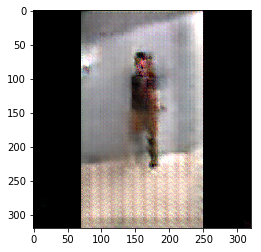

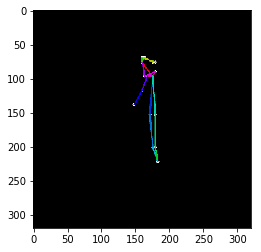

Epoch : 561
.........................................................................................................................................................................
24.61537048520421
0.04675506236733134
0.10017109427855983
Epoch : 562
.........................................................................................................................................................................
25.386617722595936
0.03932789096118332
0.30091565680164656
Epoch : 563
.........................................................................................................................................................................
23.46333165422699
0.021300531007537465
0.40757691566267507
Epoch : 564
.........................................................................................................................................................................
21.39737207085423
0.026405874447286804
0.1881382397765028
Epoch : 565
..........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
23.277497737365362
0.056257999278871595
0.16830675681815985


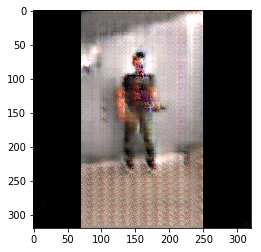

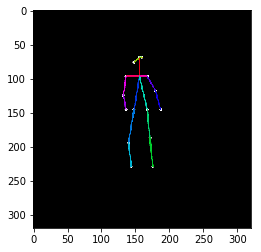

Epoch : 571
.........................................................................................................................................................................
24.31919864789974
0.06949762313326964
0.14660166864850316
Epoch : 572
.........................................................................................................................................................................
25.03053177037888
0.03789192340747341
0.3648184221164923
Epoch : 573
.........................................................................................................................................................................
22.2087700973601
0.009373784329339987
0.42619254483225527
Epoch : 574
.........................................................................................................................................................................
22.947761651326918
0.043599644475633685
0.14061250368211986
Epoch : 575
...........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



29.387844971651155
0.11410063966138607
0.02964645817795384


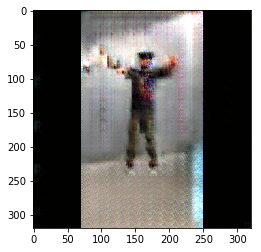

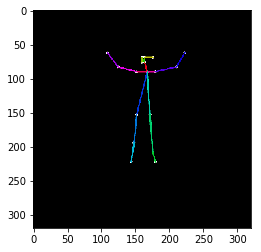

Epoch : 581
.........................................................................................................................................................................
27.612402464511128
0.03252505163929458
0.13636721262125923
Epoch : 582
.........................................................................................................................................................................
26.72347749337642
0.03261581092481369
0.29589141910945227
Epoch : 583
.........................................................................................................................................................................
25.430455808456127
0.04233355723704294
0.37474397904719076
Epoch : 584
.........................................................................................................................................................................
23.00235927175488
0.41197077645480884
0.10895620825093151
Epoch : 585
..........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


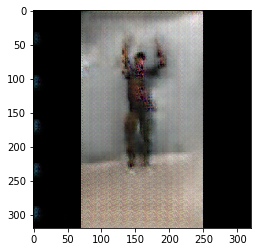

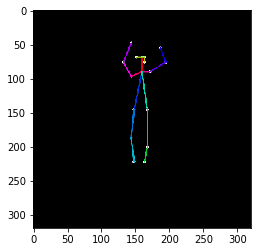

Epoch : 591
.........................................................................................................................................................................
23.117770781883827
0.05064860065292436
0.1877555016979698
Epoch : 592
.........................................................................................................................................................................
24.381883305205395
0.12059374514010401
0.06810308966592163
Epoch : 593
.........................................................................................................................................................................
22.976846243502827
0.01155936807454177
0.3253766866847257
Epoch : 594
.........................................................................................................................................................................
22.32018777181411
0.007143180585066966
0.39370039391218403
Epoch : 595
..........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
24.657387417449048
0.12129237185115015
0.13146515657494895


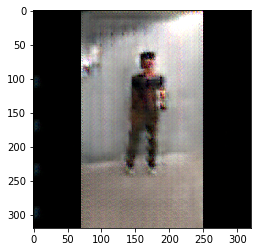

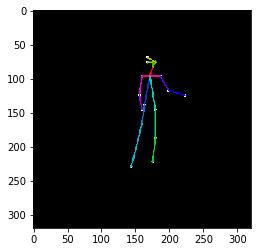

Epoch : 601
.........................................................................................................................................................................
24.33976310244679
0.005658928102310441
0.45945072621866556
Epoch : 602
.........................................................................................................................................................................
23.927646016228127
0.06289206520045791
0.20920331541466655
Epoch : 603
.........................................................................................................................................................................
23.35918131946812
0.05827147936916475
0.08729847179911882
Epoch : 604
.........................................................................................................................................................................
24.63896656600681
0.029585925249899434
0.07868843744819119
Epoch : 605
.........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


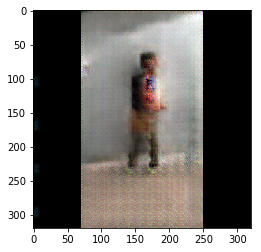

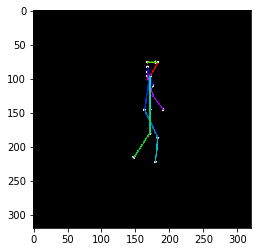

Epoch : 611
.........................................................................................................................................................................
24.945575149807
0.000583518717355064
0.25511963688188305
Epoch : 612
.........................................................................................................................................................................
24.544059053680602
0.0036567933921770753
0.4728443113893333
Epoch : 613
.........................................................................................................................................................................
27.303299418567907
0.09973971499810629
0.1449264569672907
Epoch : 614
.........................................................................................................................................................................
28.230927264196634
0.3114708347422252
0.058611377524080514
Epoch : 615
..........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
22.487315031198357
0.009442731768308227
0.47846785870391206


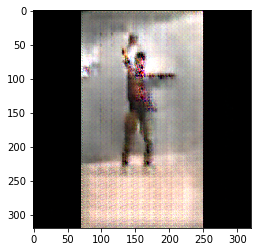

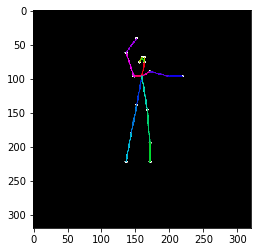

Epoch : 621
.........................................................................................................................................................................
27.957134901419195
0.09932886822327733
0.4045706647185129
Epoch : 622
.........................................................................................................................................................................
28.491244558751937
0.10128268248806312
3.199027159683853e-06
Epoch : 623
.........................................................................................................................................................................
27.70623479086972
0.004604780329708201
0.26229085883706943
Epoch : 624
.........................................................................................................................................................................
29.83692342430882
0.007741696444642271
0.516045660494461
Epoch : 625
.........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
29.601886946774094
0.03188318735563738
0.04429130783061609


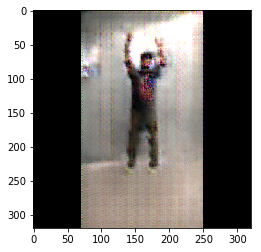

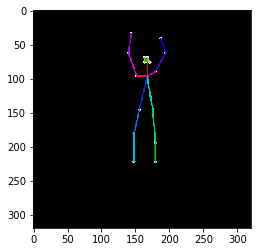

Epoch : 631
.........................................................................................................................................................................
30.209114520507452
0.0033810449796678795
0.8169478266195552
Epoch : 632
.........................................................................................................................................................................
28.563599067326834
0.029260114779668892
0.4061607810983451
Epoch : 633
.........................................................................................................................................................................
26.09710727781939
0.02151506206417035
0.10172667889280237
Epoch : 634
.........................................................................................................................................................................
28.410248214676535
0.04019566188651279
0.2337908538074798
Epoch : 635
.........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


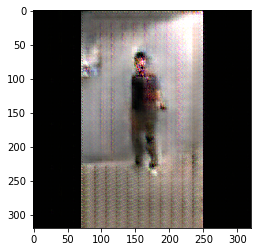

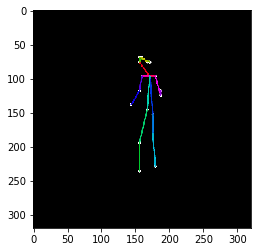

Epoch : 641
.........................................................................................................................................................................
33.59506040494117
0.025007326339445943
0.2411991185219789
Epoch : 642
.........................................................................................................................................................................
31.097776886979503
0.040332691880740956
0.10587078441084882
Epoch : 643
.........................................................................................................................................................................
29.476809100991876
0.04759643122226591
0.007749808666804118
Epoch : 644
.........................................................................................................................................................................
32.52140235900879
0.03793450494182783
0.00010179489443792894
Epoch : 645
.....................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
29.59457488878239
0.048818629772750796
0.08485256770871828


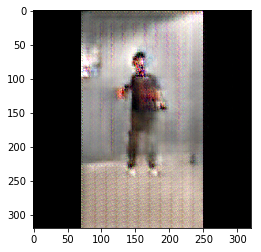

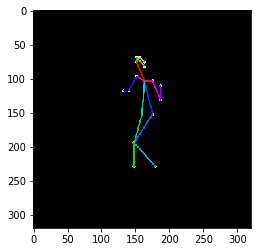

Epoch : 651
.........................................................................................................................................................................
32.72254611472406
0.056372196462499226
4.584874306574524e-05
Epoch : 652
.........................................................................................................................................................................
32.6019572703796
0.06154713286702199
0.195001339257394
Epoch : 653
.........................................................................................................................................................................
30.465465049066488
0.04093476236301637
0.020389199075753497
Epoch : 654
.........................................................................................................................................................................
34.506982487334305
0.0672898259610642
0.03571207186196683
Epoch : 655
..........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



27.699358849835818
0.05922160003040431
0.22023987650690283


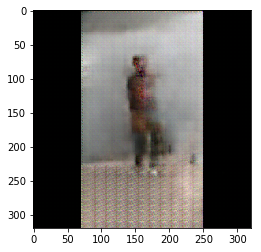

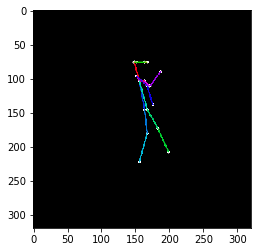

Epoch : 661
.........................................................................................................................................................................
26.391949131643983
0.0005389784195095898
0.36091936326758955
Epoch : 662
.........................................................................................................................................................................
25.9940481998864
0.024693622800445292
0.17991112326696765
Epoch : 663
.........................................................................................................................................................................
31.506791487247988
0.031413449659928976
0.29334179103463515
Epoch : 664
.........................................................................................................................................................................
27.40350694487081
0.25261797870914005
0.06718535343040831
Epoch : 665
.......................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


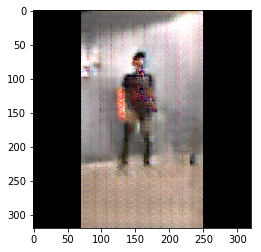

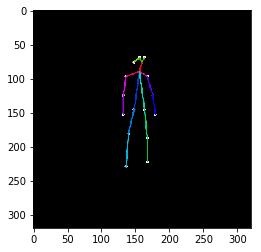

Epoch : 671
.........................................................................................................................................................................
31.306532825943986
0.053468134890610905
0.024026066433397903
Epoch : 672
.........................................................................................................................................................................
28.779498235713803
0.04431306856750131
0.16639169953950173
Epoch : 673
.........................................................................................................................................................................
28.147529799557297
0.19026160886641597
0.09970864517551714
Epoch : 674
.........................................................................................................................................................................
28.576734209907126
0.03506708819098326
0.05341882706408692
Epoch : 675
......................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


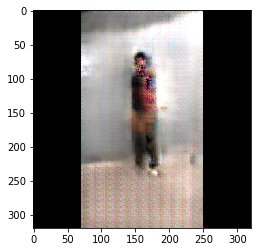

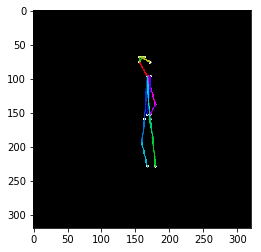

Epoch : 681
.........................................................................................................................................................................
32.07112831476877
0.06971592903879274
0.1825629304815524
Epoch : 682
.........................................................................................................................................................................
31.92634105682373
0.11132482206808378
0.00011132505827618669
Epoch : 683
.........................................................................................................................................................................
34.436796978380556
0.0505878800848932
0.04572280259323716
Epoch : 684
.........................................................................................................................................................................
32.546653126823834
0.013693592605653393
0.6055154855051621
Epoch : 685
.........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
31.448345359260514
0.0078039597784785334
0.006436355923961081


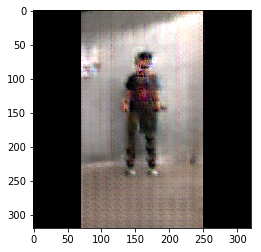

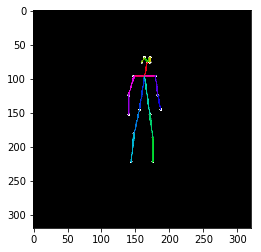

Epoch : 691
.........................................................................................................................................................................
31.81824599497417
0.0005353072552298606
0.45188455678457806
Epoch : 692
.........................................................................................................................................................................
28.968789549268916
0.0037258310475188914
0.5841812094256847
Epoch : 693
.........................................................................................................................................................................
27.749847462896764
0.04670504892858273
0.08565088842298264
Epoch : 694
.........................................................................................................................................................................
28.332193656785954
0.05642146306496511
0.1587552608163643
Epoch : 695
.......................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


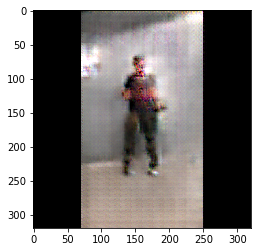

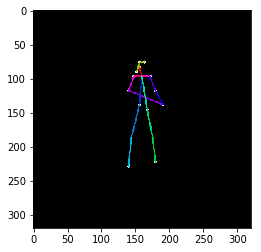

Epoch : 701
.........................................................................................................................................................................
28.62147096487192
0.0031517618310334733
0.500334589152341
Epoch : 702
.........................................................................................................................................................................
30.281866632269683
0.005715205501965089
0.3305244880522243
Epoch : 703
.........................................................................................................................................................................
27.923038855106874
0.09808258187679618
0.06988350849724022
Epoch : 704
.........................................................................................................................................................................
30.23703192535942
0.07627552675009028
0.06366577042872248
Epoch : 705
..........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
28.376152168364214
0.05600526590748383
0.1500795086464392


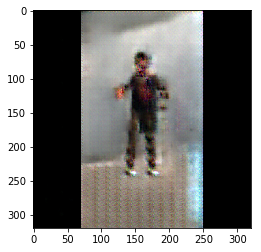

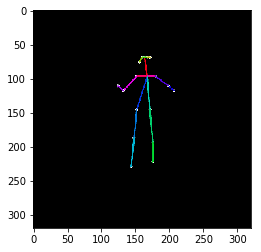

Epoch : 711
.........................................................................................................................................................................
27.117476660824387
0.03454025242733331
0.22201705924020881
Epoch : 712
.........................................................................................................................................................................
24.81418585918359
0.03700221141853971
0.4119482344416524
Epoch : 713
.........................................................................................................................................................................
28.394079609030097
0.009582526329056916
0.15766325017548244
Epoch : 714
.........................................................................................................................................................................
26.78506942049286
0.004002192301165139
0.38217308148889395
Epoch : 715
.........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


.
33.596534469423915
0.04083978549411874
0.13768352004683349


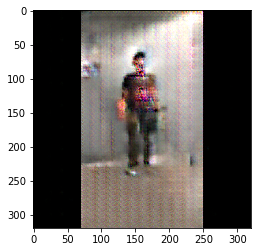

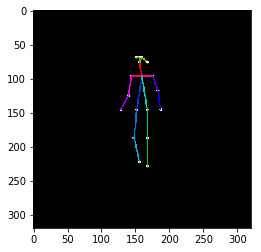

Epoch : 721
.........................................................................................................................................................................
34.49997063360271
0.011925504196946856
1.0636298932402265e-05
Epoch : 722
.........................................................................................................................................................................
29.48029560450266
0.013068218654276395
0.20380563623598588
Epoch : 723
.........................................................................................................................................................................
34.1800422273444
0.031683043807796234
0.01015654666723643
Epoch : 724
.........................................................................................................................................................................
33.86558514657105
0.0021406831318637153
0.7677510763829379
Epoch : 725
......................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


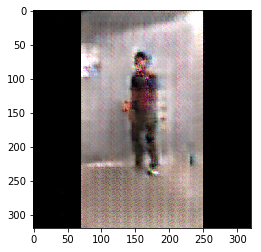

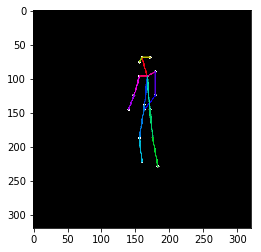

Epoch : 731
.........................................................................................................................................................................
26.441538545506944
0.011687994100507677
0.10574404444537389
Epoch : 732
.........................................................................................................................................................................
30.14525630206046
0.017447149209865603
0.39271379633031994
Epoch : 733
.........................................................................................................................................................................
29.71782778564995
0.021778201123389844
0.5400482140193533
Epoch : 734
.........................................................................................................................................................................
28.86354455722154
0.0022785274764897754
0.2058928312423185
Epoch : 735
........................

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


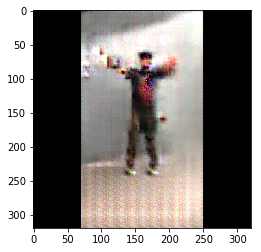

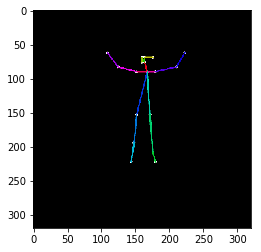

Epoch : 741
.........................................................................................................................................................................
30.796841316674588
0.03906523148141983
0.1744515838435124
Epoch : 742
.........................................................................................................................................................................
31.085579578693096
0.3237223659672328
0.034795799942539146
Epoch : 743
.............................................................................................................................................

KeyboardInterrupt: ignored

In [0]:

sess.run(tf.global_variables_initializer())

#Solving - put this in loop - write code to save model - ask bhushan. 
sess.run(tf.initialize_all_variables())
saver = tf.train.Saver()

for epoch in range(EPOCHS):
  print('Epoch :',epoch)
  
  temp_gen_losses = []
  temp_d1_losses = []
  temp_d2_losses = []
  
  file_indices = list(range(1,MAX_FILE_INDEX+1, 1))
  random.shuffle(file_indices)
  for file_index in file_indices:
    
    #Preparing data
    discriminator_1_input = np.stack(pickle.load(open( "./drive/My Drive/DL Project/Training Data320/"+str(file_index)+"_train1.p", "rb" )))/255
    discriminator_2_input = np.stack(pickle.load(open( "./drive/My Drive/DL Project/Training Data320/"+str(file_index)+"_train3.p", "rb" )))/255
    noise_input = np.random.rand(discriminator_1_input.shape[0],320,320,1)
    pose_input = discriminator_1_input[...,:3]
    
    print('.', end='')
    
    #print(discriminator_1_input.shape, discriminator_2_input.shape, noise_input.shape, pose_input.shape)
  
    
    _, d1_loss, _ = sess.run([discriminator_1_optimizer, discriminator_1_loss, clip_discriminator_1_gradient], feed_dict={d1_data:discriminator_1_input, d2_data:discriminator_2_input, posemap:pose_input, noise:noise_input})
    _, d2_loss, _ = sess.run([discriminator_2_optimizer, discriminator_2_loss, clip_discriminator_2_gradient], feed_dict={d1_data:discriminator_1_input, d2_data:discriminator_2_input, posemap:pose_input, noise:noise_input})
    _, gen_loss, out_image = sess.run([generator_optimizer, generator_loss, generated_image],feed_dict={d1_data:discriminator_1_input, d2_data:discriminator_2_input, posemap:pose_input, noise:noise_input} )
  
    temp_gen_losses.append(gen_loss)
    temp_d1_losses.append(d1_loss)
    temp_d2_losses.append(d2_loss)
      
    
    #print(out_image.shape, out_image[0].shape)
    #print(pose_input.shape, pose_input[0].shape)
    
  gen_losses.append(sum(temp_gen_losses)/len(temp_gen_losses))
  d1_losses.append(sum(temp_d1_losses)/len(temp_d1_losses))
  d2_losses.append(sum(temp_d2_losses)/len(temp_d2_losses))
  print()
  print(gen_losses[-1])
  print(d1_losses[-1])
  print(d2_losses[-1])
  
  if epoch%DISPLAY_STEP==0:
    
    gen_images.append(out_image[0])
    plt.imshow(cv2.cvtColor(out_image[0],cv2.COLOR_BGR2RGB))
#     plt.imshow(out_image[0])
    plt.show() 
    poses_for_gen_images.append(pose_input[0])
    plt.imshow(pose_input[0])
    plt.show()
  
  if epoch % SAVE_STEP == 0:
    saver.save(sess, SAVED_MODELS + 'model_' + ('0000' + str(epoch))[-3:] + '.ckpt')


  

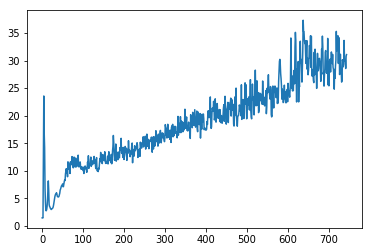

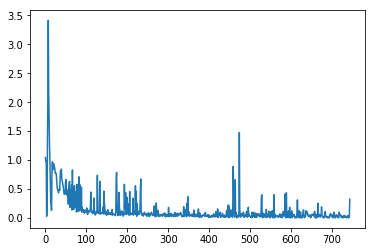

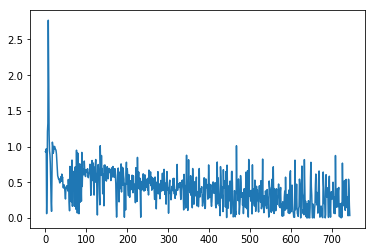

In [0]:

plt.plot(gen_losses)
plt.show()
plt.plot(d1_losses)
plt.show()
plt.plot(d2_losses)
plt.show()

In [0]:
pickle.dump(gen_images,open("./drive/My Drive/DL Project/generated_images.p", "wb"))
pickle.dump(poses_for_gen_images,open("./drive/My Drive/DL Project/poses_generated_images.p", "wb"))